In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 1.  Select all the data from table `house_price_data` to check if the data was imported correctly.

filename = '../data/regression_data.xls'
df = pd.read_excel(filename, header=0)

#2.  Drop the column `date` from the data frame, as we would not use it in the analysis. 

df.drop(labels='date', axis=1, inplace= True)

# Select all the data from the table to verify if the command worked. Limit your returned results to 10.

print (df.head(10))

           id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3       1.00         1180      5650     1.0           0   
1  6414100192         3       2.25         2570      7242     2.0           0   
2  5631500400         2       1.00          770     10000     1.0           0   
3  2487200875         4       3.00         1960      5000     1.0           0   
4  1954400510         3       2.00         1680      8080     1.0           0   
5  7237550310         4       4.50         5420    101930     1.0           0   
6  1321400060         3       2.25         1715      6819     2.0           0   
7  2008000270         3       1.50         1060      9711     1.0           0   
8  2414600126         3       1.00         1780      7470     1.0           0   
9  3793500160         3       2.50         1890      6560     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7   

In [38]:
# How many rows of data do you have?

df.shape[0]


(21597, 21)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [42]:
# 4.1. What are the unique values in the column `bedrooms`?

bedrooms=df.bedrooms.unique()
bedrooms
print('Unique values in bedrooms: ' + str(bedrooms.size))

Unique values in bedrooms: 12


In [10]:
# 4.2. What are the unique values in the column `bathrooms`?

bathrooms=df.bathrooms.unique()
bathrooms
print('Unique values in bathrooms: ' + str(bathrooms.size))

Unique values in bathrooms: 29


In [11]:
# 4.3. What are the unique values in the column `floors`?

floors=df.floors.unique()
floors
print('Unique values in floors: ' + str(floors.size))


Unique values in floors: 6


In [12]:
# 4.4. What are the unique values in the column `condition`?

condition=df.condition.unique()
condition
print('Unique values in condition: ' + str(condition.size))

Unique values in condition: 5


In [13]:
# 4.5. What are the unique values in the column `grade`?

grade=df.grade.unique()
grade
print('Unique values in grade: ' + str(grade.size))

Unique values in grade: 11


In [14]:
# 5.  Arrange the data in decreasing order by the price of the house. Return only the IDs of the top 10 
# most expensive houses in your data.

dfordenado = df.sort_values(by="price", ascending=False) #5

dfordenado.head(10).id.reset_index()

,index,id
0,7245,6762700020
1,3910,9808700762
2,9245,9208900037
3,4407,2470100110
4,1446,8907500070
5,1313,7558700030
6,1162,1247600105
7,8085,1924059029
8,2624,7738500731
9,8629,3835500195


In [ ]:
# 6.  What is the average price of all the properties in your data?

print('The average price is: ')
df["price"].mean()

In [15]:
# 7.1. What is the average price of the houses grouped by bedrooms? The returned result should have only two columns:
# `Bedrooms` and `Average price`. 

be=df.groupby(['bedrooms'])
be["price"].mean().to_frame("Average Price").reset_index()

,bedrooms,Average Price
0,1,3.182395e+05
1,2,4.013877e+05
2,3,4.662766e+05
3,4,6.355647e+05
4,5,7.868741e+05
5,6,8.258535e+05
6,7,9.514478e+05
7,8,1.105077e+06
8,9,8.939998e+05
9,10,8.200000e+05


In [44]:
# 7.2. What is the average `sqft_living` of the houses grouped by bedrooms? The returned result should have only two columns,
# `Bedrooms` and `Average_sqft_living`.

be["sqft_living"].mean().to_frame("Average sqft_living").reset_index()


,Average sqft_living
bedrooms,
1,888.153061
2,1239.752899
3,1805.837235
4,2554.649666
5,3047.545284
6,3284.341912
7,3974.210526
8,3800.000000
9,3775.000000


In [45]:
# 7.3.  What is the average price of the houses with a waterfront and without a waterfront? The returned result should have
# only two columns, `Waterfront` and `Average_price`.

w=df.groupby(['waterfront'])
w["price"].mean().to_frame('Average Price')

,Average Price
waterfront,
0,5.317623e+05
1,1.662524e+06


In [46]:
# 7.4. Is there any correlation between the columns `condition` and `grade`? Also, create a plot to visually check if
# there is a positive correlation or negative correlation or no correlation between both variables.

df['condition'].corr(df['grade'])

# We can see that there is a negative correlation

-0.14689580091008858

<AxesSubplot:xlabel='condition', ylabel='grade'>

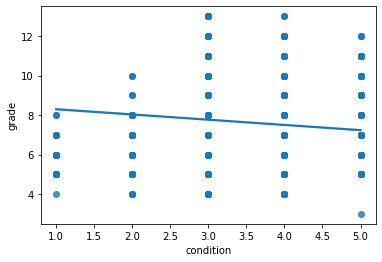

In [16]:
# 7.5. Get the number of houses in each category (ie number of houses for a given `condition`)
# to assess if that category is well represented in the dataset to include it in your analysis. For eg.
# If the category is under-represented as compared to other categories, ignore that category in this analysis

col1=df['condition']
col2=df['grade']

sns.regplot(x=col1, y=col2)

In [17]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [18]:
df.condition.values

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [19]:
# 8. One of the customers is only interested in the following houses:

#    - Number of bedrooms either 3 or 4
#   - Bathrooms more than 3
#    - One Floor
#    - No waterfront
#    - Condition should be 3 at least
#    - Grade should be 5 at least
#    - Price smaller than 300000
#    For the rest of the things, they are not too concerned. Write code to find what are the houses available for them?

habitaciones=df['bedrooms'] = 3 or 4
baños=df['bathrooms'] >3
pisos=df['floors'] ==1
waterfront=df['waterfront'] ==0
condition=df['condition'] >=3
grade=df['grade'] >=5
price=df['price'] < 300000
df[habitaciones & baños & pisos & waterfront & condition & grade & price]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1924,7316400070,2014-09-25,3,3.75,2800,9900,1.0,0,0,3,...,2800,0,1964,0,98023,47.3190,-122.344,1700,13200,255000
8608,5379801972,2014-08-18,3,4.00,1400,8580,1.0,0,0,5,...,900,500,1954,0,98188,47.4560,-122.292,1220,8832,265000
8905,822059038,2014-07-31,3,4.50,2810,11214,1.0,0,0,3,...,2010,800,1958,0,98031,47.4045,-122.197,1940,8349,290000


In [20]:
# 9. Your manager wants to find out the list of properties whose prices are twice more than the average of all
# the properties in the database. Write code to show them the list of such properties.
avg_price=df["price"].mean()
desired_price= df["price"] > 2*avg_price
df[desired_price]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5,7237550310,2014-05-12,3,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
21,2524049179,2014-08-26,3,2.75,3050,44867,1.0,0,4,3,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
49,822039084,2015-03-11,3,2.50,2753,65005,1.0,1,2,5,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000
69,1802000060,2014-06-12,3,2.25,3200,20158,1.0,0,0,3,...,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,1330000
91,5036300431,2015-03-11,3,2.75,3520,6353,2.0,0,0,4,...,3520,0,2001,0,98199,47.6506,-122.391,2520,6250,1100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,9253900271,2015-01-07,3,4.50,4850,10584,2.0,1,4,3,...,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,3570000
21574,7430200100,2014-05-14,3,3.50,4910,9444,1.5,0,0,3,...,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,1220000
21577,8672200110,2015-03-17,3,3.75,4170,8142,2.0,0,2,3,...,4170,0,2006,0,98056,47.5354,-122.181,3030,7980,1090000
21581,191100405,2015-04-21,3,3.25,3410,10125,2.0,0,0,3,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,1580000


In [51]:
# 10. Most customers are interested in properties with three or four bedrooms. What is the difference in average prices of
# the properties with three and four bedrooms? In this case you can simply use a `groupby` to check the prices for those
# particular houses.

tres = df["bedrooms"] == 3
cuatro = df["bedrooms"] == 4
precio_tres = df[tres].price.mean()
precio_cuatro=df[cuatro].price.mean()

diferencia = precio_cuatro - precio_tres

print(int(diferencia))

169288


In [22]:
# 11. What are the different locations where properties are available in your database? (distinct zip codes).

zip=df.zipcode.unique()
print('Unique values in zipcode: ' + str(zip.size))

Unique values in zipcode: 70


In [23]:
# 12. Show all the properties that were renovated.

renovated=df['yr_renovated'] >0
df[renovated]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
35,9547205180,2014-06-13,3,2.50,2300,3060,1.5,0,0,3,...,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,696000
95,1483300570,2014-09-08,3,2.50,3300,10250,1.0,0,0,3,...,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,905000
103,2450000295,2014-10-07,3,2.50,2920,8113,2.0,0,0,3,...,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1090000
115,3626039325,2014-11-21,3,3.50,4380,6350,2.0,0,0,3,...,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,2015-01-14,3,1.75,1760,6788,2.0,1,4,3,...,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1150000
20041,126039256,2014-09-04,3,2.00,1520,5040,2.0,0,0,3,...,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,434900
20428,4305600360,2015-02-25,3,2.50,2400,9612,1.0,0,0,3,...,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,500012
20431,3319500628,2015-02-12,3,1.50,1010,1546,2.0,0,0,3,...,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,356999


In [24]:
# 13. Provide the details of the property that is the 11th most expensive property in your database.

dfordenado = df.sort_values(by="price", ascending=False)
dfordenado.iloc[9,:]

id                        3835500195
date             2014-06-18 00:00:00
bedrooms                           3
bathrooms                        3.0
sqft_living                     6430
sqft_lot                       27517
floors                           2.0
waterfront                         0
view                               0
condition                          3
grade                             12
sqft_above                      6430
sqft_basement                      0
yr_built                        2001
yr_renovated                       0
zipcode                        98004
lat                          47.6208
long                        -122.219
sqft_living15                   3720
sqft_lot15                     14592
price                        4490000
Name: 8629, dtype: object